<a href="https://colab.research.google.com/github/igoorsa/MachineLearning/blob/main/Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

In [20]:
names = ['Coment', 'Blast','Fly','Water', 'Superplasticizer','Coarse','Fine','Age','Concrete']

In [22]:
dados = pd.read_excel('/content/Concrete_Data.xls', names = names)
dados.head()

,Coment,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Concrete
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [24]:
dados.isnull().sum()/len(dados['Age'])*100

Coment              0.0
Blast               0.0
Fly                 0.0
Water               0.0
Superplasticizer    0.0
Coarse              0.0
Fine                0.0
Age                 0.0
Concrete            0.0
dtype: float64

In [6]:
dados.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8352702fe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f83527033a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8352701ff0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8352700790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8352703e80>,
 'means': []}

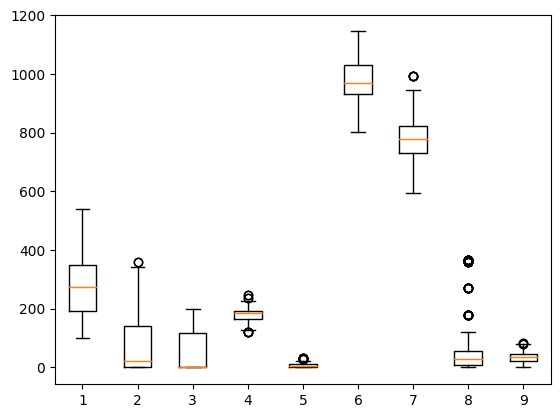

In [9]:
plt.boxplot(dados)

In [40]:
linear = LinearRegression()
lasso = Lasso()
ridge = Ridge()

kn = KNeighborsRegressor()
np.random.seed(2)

In [25]:
x = dados.drop('Concrete', axis =1)
y = dados['Concrete']

In [70]:
from sklearn.utils import shuffle
def melhorModelo(modelo,x,y):
  Bg = BaggingRegressor(modelo,100)
  return cross_val_score(Bg,x,y, cv = KFold(shuffle=True)).mean()


In [71]:
melhorModelo(linear,x,y)

0.6010862695565938

In [72]:
melhorModelo(lasso,x,y)

0.6025645261976265

In [73]:
melhorModelo(ridge,x,y)

0.5998040067461584

In [74]:
norm = MinMaxScaler((0,1))
x_norm = norm.fit_transform(x)
melhorModelo(kn,x_norm,y)

0.7044440133300599

In [75]:
melhorModelo(None,x,y)

0.9083850757964941